# State space models

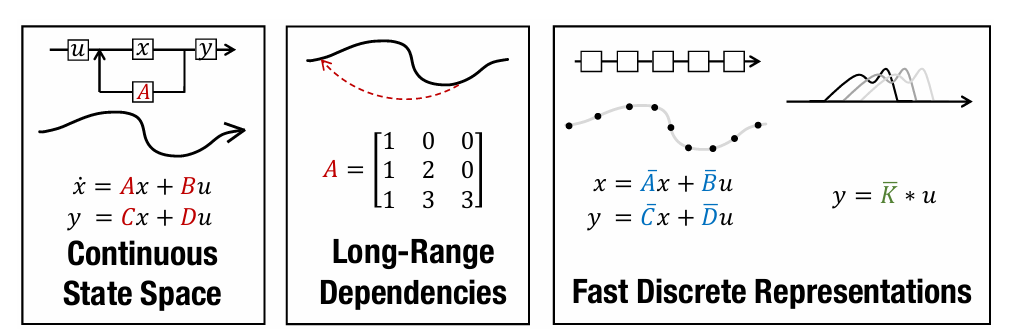

$\frac{dx(t)}{dt} = Ax(t)+Bu(t)$

$y(t) = Cx(t)+Du(t)$,

где $u$ - входящий сигнал

$x$ - скрытое состояние (внутреннее восприятие входящего сигнала моделью)

$y$ - выходной сигнал (ответ модели на входящий сигнал)

$A$ — это матрица переходного состояния. Она показывает, как модель переходит из текущего состояния в следующее. «Как мне забыть менее важные части состояния с течением времени?»

$B$ отображает новый ввод в состояние, спрашивая: «Какую часть моего нового ввода я должен запомнить?»

$C$ отображает состояние на выход. «Как я могу использовать состояние, чтобы сделать хороший следующий прогноз?»

$D$ — это то, как новый ввод влияет на выход. «Как я могу использовать новый ввод в моем прогнозе?

Все эти матрицы формируются в процессе обучения модели, однако есть модификации, способные менять матрицы и улучшать тем самым выводы модели.

## Первое улучшение - HiPPo matrix

$A_{nk} = - \begin{cases}
      (2n + 1)^{1/2}(2k+1)^{1/2}, n > k\\
      n + 1, n = k\\
      0, n < k
    \end{cases}
$

Благодаря только лишь этой матрице размерности N $ 𝘅 $ N точность модели на конкретном датасете увеличивается с 60 до 98 %. Эта матрица позволяет модели лучше "заглядывать в прошлое", коррекируя влияние уже сложившейся картины мира модели (вектора $x$) на изменение этого влияния.

## Второе улучшение - реккурентная репрезентация

Для начала дискретизируем систему уравнений методом конечных разностей (Эйлера)
$dx/dt = (x_k - x_{k-1}) / \tau $

После введём следующие переобозначения: \\
$ x_k = \bar{A} x_{k-1} +\bar{B} u_k \\
y_k = \bar{C}x_k, $ \\
$ \bar{A}=(I - \frac{\Delta}{2} A)^{-1}(I + \frac{\Delta}{2} A) \\
  \bar{B} = (I - \frac{\Delta}{2} A)^{-1} \Delta B \\
  \bar{C} =C $

После этого можно записать реккурентное уравнение на $y_k$ со сверточный ядром, которое очень быстро можно вычислять благодаря быстрому преобразованию Фурье. \\
$ y = \bar{K}u$

Именно эффективному вычислению данного сверточного ядра и посвящён третий раздел статьи и третье улучшение:

## Третье улучшение - эффективное вычисление $\bar{K}$

Вычисление произведения матриц очень громоздко и требует $N^2L$ операций, где $N$ - размерность матрицы, $L$ - шаг.
Вместо того, чтобы напрямую считать произвдения, можно привести матрицу к диагональному виду: $A→V^{-1}AV$. Однако матрицы HiPPo нельзя привести к диагональному виду, поэтому они приводятся следующим образом: \\
$A=VΛV^*−PQ^⊤$, \\
где $V — унитарная, Λ — диагональная, P,Q $ — низкоранговые матрицы. \\
Таким образом матрица $\bar{A}$ сводится к более простой с вычислительной точки зрения матрице и операции с ней занимают уже $O(N+L)$.  
Используя матрицу $\bar{A}$, вычисляются дополнительные величины, по которым считается не сама матрица $\bar{K}$, а её производящая функция, а затем с помощью обратного преобразования Фурье находится и сама матрица $\bar{K}$.